# Example of Data Preparation Using SDY4
<i><font size=2 color="grey">Version 1.0, last modified November 2017<br>
Python 3.6<br>
pandas 0.21.0<br>
seaborn 0.8.1<br>
matplotlib 2.1.0<br>
</font></i> 
  
This is a tutorial on using Python tools to prepare ImmPort study information for analysis. This tutorial should NOT be considered as a real scientific analysis, but is ONLY intended to show how be prepare data for real analysis. This tutorial will use SDY4 as the example study, but we will download all ALLSTUDIES package, to show
how you can extract individual studies for analysis. If you are only interested in the analysis of one specific
study, individual download packages are available.

This tutorial concentrates on how to prepare the lab test and assessments information for analysis. The download
packages contain many more types of data that you can explore. The data in the ALLSTUDIES package was extraced
from a MySQL database and the content of each file in the ALLSTUDIES package contains the data from a table.
An overview of the ImmPort data model is available [here](http://www.immport.org/immport-open/public/schema/schemaTree), the table definitions are available [here](http://www.immport.org/immport-open/public/schema/schemaDefinition/study), and the ER diagrams are available [here](http://www.immport.org/immport-open/public/schema/schemaDiagram/AllTables)


For this analysis we will start by creating a top level directory named ALLSTUDIES. Below the ALLSTUDIES directory three directories where created: data, downloads and notebooks. The ALLSTUDIES_DR24_Tab.zip file was downloaded from the ImmPort Data Browser [web site](https://aspera-immport.niaid.nih.gov:9443) to the **downloads** directory.

The following commands were used to unzip and move the contents to the **data** directory

```shell
cd downloads
unzip ALLSTUDIES_DR24_Tab.zip
cd ALLSTUDES-DR24_Tab/Tab
mv * ../../../data
```

To start the Jupyter Notebook the following commands were used.

```shell
cd ../../../notebooks
jupyter notebook
```

# Load in Python Modules

Import the Python modules we will be using for analysis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data from the ALLSTUDIES Package

Preload all the data we will be using for the tutorial. For each file loaded into a DataFrame, the column names
and the number of rows and columns for each table will be printed.

## Load Study, ARM, Subject and Biosample

In the ImmPort model a **study** can have one or more **arms_or_cohort** records, and a **subject** is 
assigned to **arm_or_cohort**. Read in the study, arm_or_cohort and arm_2_subject data, so we can build
a mapping that includes the study_accession, arm_accession and subject_accession. We will use this information later to map **arm** to **assessment** and **lab_test** using the **subject_accession**.

We will not use the **study** table for this but you may want to review the column names and content. If you
want to make a quick review of the types of data available in any table, you can use the df.head() command
to get a tabular view of the table, after using the pd.read_table command. The study.head() command should be
the last line in a notebook cell, to get the table to display.

In [2]:
print("STUDY")
print("============================================================")
study = pd.read_table("../data/study.txt",sep="\t")
print(study.columns)
print(study.shape)
# study.head()

print("")
print("ARM_OR_COHORT")
print("============================================================")
arm_or_cohort = pd.read_table("../data/arm_or_cohort.txt",sep="\t")
print(arm_or_cohort.columns)
print(arm_or_cohort.shape)
# arm_or_cohort.head()

print("")
print("ARM_2_SUBJECT")
print("============================================================")
arm_2_subject = pd.read_table("../data/arm_2_subject.txt",sep="\t")
print(arm_2_subject.columns)
print(arm_2_subject.shape)

# arm_2_subject.head()

print("")
print("BIOSAMPLE")
print("============================================================")
biosample = pd.read_table("../data/biosample.txt",sep="\t")
print(biosample.columns)
print(biosample.shape)

STUDY
Index(['STUDY_ACCESSION', 'ACTUAL_COMPLETION_DATE', 'ACTUAL_ENROLLMENT',
       'ACTUAL_START_DATE', 'AGE_UNIT', 'BRIEF_DESCRIPTION', 'BRIEF_TITLE',
       'CLINICAL_TRIAL', 'CONDITION_STUDIED', 'DCL_ID', 'DESCRIPTION', 'DOI',
       'ENDPOINTS', 'GENDER_INCLUDED', 'HYPOTHESIS',
       'INITIAL_DATA_RELEASE_DATE', 'INITIAL_DATA_RELEASE_VERSION',
       'INTERVENTION_AGENT', 'LATEST_DATA_RELEASE_DATE',
       'LATEST_DATA_RELEASE_VERSION', 'MAXIMUM_AGE', 'MINIMUM_AGE',
       'OBJECTIVES', 'OFFICIAL_TITLE', 'SPONSORING_ORGANIZATION',
       'TARGET_ENROLLMENT', 'TYPE', 'WORKSPACE_ID'],
      dtype='object')
(301, 28)

ARM_OR_COHORT
Index(['ARM_ACCESSION', 'DESCRIPTION', 'NAME', 'STUDY_ACCESSION', 'TYPE',
       'WORKSPACE_ID'],
      dtype='object')
(1384, 6)

ARM_2_SUBJECT
Index(['ARM_ACCESSION', 'SUBJECT_ACCESSION', 'AGE_EVENT', 'AGE_EVENT_SPECIFY',
       'AGE_UNIT', 'MAX_SUBJECT_AGE', 'MIN_SUBJECT_AGE', 'SUBJECT_PHENOTYPE'],
      dtype='object')
(52432, 8)

BIOSAMPLE
Index(['

In [3]:
arm_or_cohort_short = arm_or_cohort[['STUDY_ACCESSION','ARM_ACCESSION']]
study_arm_subject = pd.merge(arm_or_cohort_short,arm_2_subject,left_on='ARM_ACCESSION',right_on='ARM_ACCESSION')
# Uncomment to review contents
# study_arm_subject.head()

In [4]:
study_arm_subject_mapping = study_arm_subject[['STUDY_ACCESSION','ARM_ACCESSION','SUBJECT_ACCESSION']]
print(study_arm_subject_mapping.shape)
study_arm_subject_mapping.head()

(52432, 3)


,STUDY_ACCESSION,ARM_ACCESSION,SUBJECT_ACCESSION
0,SDY9,ARM268,SUB108253
1,SDY9,ARM268,SUB108267
2,SDY9,ARM268,SUB108296
3,SDY9,ARM268,SUB108313
4,SDY9,ARM268,SUB108325


In [5]:
biosample_short = biosample[['STUDY_ACCESSION','BIOSAMPLE_ACCESSION','SUBJECT_ACCESSION',
                            'PLANNED_VISIT_ACCESSION','STUDY_TIME_COLLECTED']]
print(biosample_short.shape)
biosample_short.head()

(337319, 5)


,STUDY_ACCESSION,BIOSAMPLE_ACCESSION,SUBJECT_ACCESSION,PLANNED_VISIT_ACCESSION,STUDY_TIME_COLLECTED
0,SDY557,BS803701,SUB148265,PV3557,11.0
1,SDY557,BS803713,SUB148280,PV3559,56.0
2,SDY557,BS803722,SUB148290,PV3554,0.0
3,SDY557,BS803736,SUB148305,PV3554,-1.0
4,SDY557,BS803743,SUB148313,PV3554,0.0


# Load Assessment Data

Assessment information is contained in 2 tables in the ImmPort data model. The **assessment_panel** is
used to group individual **assessment_component** records into panels. To perform analysis it is useful
to merge the information from these 2 tables into 1 DataFrame

In [6]:
print("ASSESSMENT_PANEL")
print("============================================================")
assessment_panel = pd.read_table("../data/assessment_panel.txt",sep="\t")
print(assessment_panel.columns)
print(assessment_panel.shape)

print("")
print("ASSESSMENT_COMPONENT")
print("============================================================")
assessment_component = pd.read_table("../data/assessment_component.txt",sep="\t")
print(assessment_component.columns)
print(assessment_component.shape)

ASSESSMENT_PANEL
Index(['ASSESSMENT_PANEL_ACCESSION', 'ASSESSMENT_TYPE', 'NAME_PREFERRED',
       'NAME_REPORTED', 'STATUS', 'STUDY_ACCESSION', 'WORKSPACE_ID'],
      dtype='object')
(444, 7)

ASSESSMENT_COMPONENT
Index(['ASSESSMENT_COMPONENT_ACCESSION', 'AGE_AT_ONSET_PREFERRED',
       'AGE_AT_ONSET_REPORTED', 'AGE_AT_ONSET_UNIT_PREFERRED',
       'AGE_AT_ONSET_UNIT_REPORTED', 'ASSESSMENT_PANEL_ACCESSION',
       'IS_CLINICALLY_SIGNIFICANT', 'LOCATION_OF_FINDING_PREFERRED',
       'LOCATION_OF_FINDING_REPORTED', 'NAME_PREFERRED', 'NAME_REPORTED',
       'ORGAN_OR_BODY_SYSTEM_PREFERRED', 'ORGAN_OR_BODY_SYSTEM_REPORTED',
       'PLANNED_VISIT_ACCESSION', 'REFERENCE_RANGE_ACCESSION',
       'RESULT_UNIT_PREFERRED', 'RESULT_UNIT_REPORTED',
       'RESULT_VALUE_CATEGORY', 'RESULT_VALUE_PREFERRED',
       'RESULT_VALUE_REPORTED', 'STUDY_DAY', 'SUBJECT_ACCESSION',
       'SUBJECT_POSITION_PREFERRED', 'SUBJECT_POSITION_REPORTED',
       'TIME_OF_DAY', 'VERBATIM_QUESTION', 'WHO_IS_ASSESSED', '

## Clean and Merge Assessment_Panel and Assessment_Component

In [7]:
assessment_panel_short = assessment_panel[['ASSESSMENT_PANEL_ACCESSION','NAME_REPORTED','STUDY_ACCESSION']]
assessment_panel_short = assessment_panel_short.rename(columns={'NAME_REPORTED': "PANEL_NAME"})
# assessment_panel_short.head()

In [8]:
assessment_component_short = assessment_component[['ASSESSMENT_PANEL_ACCESSION','NAME_REPORTED',
                                                     'PLANNED_VISIT_ACCESSION','RESULT_VALUE_REPORTED',
                                                     'RESULT_UNIT_REPORTED','STUDY_DAY','SUBJECT_ACCESSION']]
assessment_component_short = assessment_component_short.rename(columns={'NAME_REPORTED': "COMPONENT_NAME"})
# assessment_component_short.head()

In [9]:
assessments = pd.merge(assessment_panel_short, assessment_component_short,
                       left_on='ASSESSMENT_PANEL_ACCESSION', right_on='ASSESSMENT_PANEL_ACCESSION')
print(assessments.shape)
# assessments.head()

(1208337, 9)


## Merge ARM information into assessements

In this case we are using the smaller study_arm_subject_mapping DataFrame because we do not want to include additional information from the study_arm_subject DataFrame. But in many cases you may want to use the full
study_arm_subject DataFrame, to include information like age at the time of the study or subject_phenotype, etc.

In [10]:
assessments = pd.merge(assessments,study_arm_subject_mapping, left_on=['STUDY_ACCESSION','SUBJECT_ACCESSION'],
                      right_on=['STUDY_ACCESSION','SUBJECT_ACCESSION'])
print(assessments.shape)
assessments.head()

(1208337, 10)


,ASSESSMENT_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION,COMPONENT_NAME,PLANNED_VISIT_ACCESSION,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED,STUDY_DAY,SUBJECT_ACCESSION,ARM_ACCESSION
0,AP72352,Allergen History,SDY1,Food Allergy,-,No,NaN,-11.0,SUB73507,ARM4
1,AP72352,Allergen History,SDY1,Allergy to Latex,-,No,NaN,-11.0,SUB73507,ARM4
2,AP72352,Allergen History,SDY1,ALLROTH,-,No,NaN,-11.0,SUB73507,ARM4
3,AP72352,Allergen History,SDY1,Allergy to Penicillin and/or other drugs,-,No,NaN,-11.0,SUB73507,ARM4
4,AP72352,Allergen History,SDY1,Allergy to Stinging insect venoms,-,No,NaN,-11.0,SUB73507,ARM4


# Load Lab Test Data

Lab test information is contained in 2 tables in the ImmPort data model. The **lab_test_panel** is used
to group individual **lab_test** records into panels. To perform analysis it is useful to merge the 
information from these 2 tables into 1 DataFrame.

In [11]:
print("LAB_TEST_PANEL")
print("============================================================")
lab_test_panel = pd.read_table("../data/lab_test_panel.txt",sep="\t")
print(lab_test_panel.columns)
print(lab_test_panel.shape)

print("")
print("LAB_TEST")
print("============================================================")
lab_test = pd.read_table("../data/lab_test.txt",sep="\t")
print(lab_test.columns)
print(lab_test.shape)

LAB_TEST_PANEL
Index(['LAB_TEST_PANEL_ACCESSION', 'NAME_PREFERRED', 'NAME_REPORTED',
       'STUDY_ACCESSION', 'WORKSPACE_ID'],
      dtype='object')
(211, 5)

LAB_TEST
Index(['LAB_TEST_ACCESSION', 'LAB_TEST_PANEL_ACCESSION', 'BIOSAMPLE_ACCESSION',
       'NAME_PREFERRED', 'NAME_REPORTED', 'REFERENCE_RANGE_ACCESSION',
       'RESULT_UNIT_PREFERRED', 'RESULT_UNIT_REPORTED',
       'RESULT_VALUE_PREFERRED', 'RESULT_VALUE_REPORTED', 'WORKSPACE_ID'],
      dtype='object')
(820295, 11)


## Clean Lab_Test_Panel and Lab_Test

In [12]:
lab_test_panel_short = lab_test_panel[['LAB_TEST_PANEL_ACCESSION','NAME_REPORTED','STUDY_ACCESSION']]
lab_test_panel_short = lab_test_panel_short.rename(columns={'NAME_REPORTED': 'PANEL_NAME'})
#lab_test_panel_short.head()

In [13]:
lab_test_short = lab_test[['LAB_TEST_PANEL_ACCESSION','BIOSAMPLE_ACCESSION','NAME_REPORTED',
                           'RESULT_VALUE_PREFERRED','RESULT_VALUE_REPORTED','RESULT_UNIT_REPORTED']]
lab_test_short = lab_test_short = lab_test_short.rename(columns={'NAME_REPORTED': 'LAB_TEST_NAME'})
#lab_test_short.head()

In [14]:
lab_tests = pd.merge(lab_test_panel_short,lab_test_short,
                    left_on='LAB_TEST_PANEL_ACCESSION',right_on='LAB_TEST_PANEL_ACCESSION')
print(lab_tests.shape)
# lab_tests.head()

(820295, 8)


## Merge Subject and ARM Information into LabTest

In [15]:
lab_tests = pd.merge(lab_tests,biosample_short, left_on=['STUDY_ACCESSION','BIOSAMPLE_ACCESSION'],
                     right_on=['STUDY_ACCESSION','BIOSAMPLE_ACCESSION'])
lab_tests = pd.merge(lab_tests,study_arm_subject_mapping, left_on=['STUDY_ACCESSION','SUBJECT_ACCESSION'],
                    right_on=['STUDY_ACCESSION','SUBJECT_ACCESSION'])
print(lab_test.shape)
lab_tests.head()

(820295, 11)


,LAB_TEST_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION,BIOSAMPLE_ACCESSION,LAB_TEST_NAME,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED,SUBJECT_ACCESSION,PLANNED_VISIT_ACCESSION,STUDY_TIME_COLLECTED,ARM_ACCESSION
0,LP5027,Pregnancy test,SDY10,BS478395,Pregnancy test,NaN,N,NaN,SUB106739,PV1550,1.0,ARM269
1,LP5182,Complete blood count,SDY10,BS478170,Neutrophil (percent),65.60,65.6 percent,percent,SUB106739,PV1550,1.0,ARM269
2,LP5182,Complete blood count,SDY10,BS478170,Differential Monocytes (percent),NaN,. percent percent,percent,SUB106739,PV1550,1.0,ARM269
3,LP5182,Complete blood count,SDY10,BS478170,Red blood cells (RBC),5.57,5.57 M/uL,M/uL,SUB106739,PV1550,1.0,ARM269
4,LP5182,Complete blood count,SDY10,BS478170,Differential Basophils (percent),NaN,. percent percent,percent,SUB106739,PV1550,1.0,ARM269


# Helper Methods

The methods below can be used to explore the types of assessments or labtests that are available on a study basis.
At the end of this section there are a few example of how to use these methods to explore study information.
When looking at the results returned by these methods, you may want to adjust the options to control the
number of rows to display, or the option to control column width, examples of how to set these options are in
the code.

## Method to Find Assessments for a Study

In [16]:
def assessment_panels_by_study(study_accession,assessments):
    study_assessments = assessments[assessments['STUDY_ACCESSION']==study_accession]
    study_panels = study_assessments[['PANEL_NAME','COMPONENT_NAME']]
    study_panels = study_panels.groupby(['PANEL_NAME','COMPONENT_NAME']).size().reset_index(name="COUNTS")
    return study_panels

## Method to Find Labtests for a Study

In [17]:
def lab_test_panels_by_study(study_accession,lab_tests):
    study_lab_tests = lab_tests[lab_tests['STUDY_ACCESSION']==study_accession]
    study_panels = study_lab_tests[['PANEL_NAME','LAB_TEST_NAME']]
    study_panels = study_panels.groupby(['PANEL_NAME','LAB_TEST_NAME']).size().reset_index(name="COUNTS")
    return study_panels

## Examples of using the methods

For these examples, the maximum number of rows will be set to 10 and the maximum column width will
be set to 100. Set the max_rows option to see more of the information. The value passed into the df.head()
method should also be increased. At the end of the section,these options will be reset to their default values.

In [18]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_colwidth",100)

In [19]:
# Show SDY4 ??
assessment_panels = assessment_panels_by_study('SDY4',assessments)
print(assessment_panels.shape)
assessment_panels.head(10)

(124, 3)


,PANEL_NAME,COMPONENT_NAME,COUNTS
0,AD Assessment,AD diagnosis,174
1,AD Assessment,Active AD,174
2,AD Assessment,Chronic eczema,174
3,AD Assessment,Facial necke xtensor involvement,174
4,AD Assessment,Flexural lesions any age group,174
5,AD Assessment,Groin axillary regions,174
6,AD Assessment,Pruritus,174
7,AD Assessment,Typical morphology and age-specific patterns,174
8,Any Adverse Event?,Any Adverse Event?,235
9,Clinical variant of AD,Clinical variant of AD,174


In [20]:
labtest_panels = lab_test_panels_by_study('SDY4',lab_tests)
print(labtest_panels.shape)
labtest_panels.head(10)

(65, 3)


,PANEL_NAME,LAB_TEST_NAME,COUNTS
0,CBC_Results,CD16 positive/CD56 positive,235
1,CBC_Results,CD16 positive/CD56 positive percentage,235
2,CBC_Results,CD19 positive cells,235
3,CBC_Results,CD19 positive cells percentage,235
4,CBC_Results,CD3 positive cells,235
5,CBC_Results,CD3 positive cells percentage,235
6,CBC_Results,CD4 positive cells,235
7,CBC_Results,CD4 positive cells percentage,235
8,CBC_Results,CD8 positive cells,235
9,CBC_Results,CD8 positive cells percentage,235


In [21]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_colwidth")

# Long and Narrow vs Short and Wide

The information in the **assessments** and **labtests** DataFrame is in a format sometimes referred to as Long and Narrow, this means each row contains one row for each subject and value, but in order to do analysis we would like to **pivot** the data based on columns like **subject_accession**, **study_time_collected**, etc. so the data is in  more of a tabluar format, much like an Excel spreadsheet.

If you Google terms like "pivot tables python", "reshape data long to wide", or "long vs wide format", there
are plenty of examples what this means with respect to data analysis.

So for the next part of this tutorial, we will show examples of pivoting the original DataFrame into the wide
format. There are many different ways to arrive at the final wide format and these are only examples of a few
methods.

# Treatment of Null Values

How you treat null values in a data set varies widely and depends on your final analysis goals. For this tutorial
we will gloss over the problem of nulls, so these are NOT good examples of how to handle null values.

# Example Preparing CBC_Results for SDY4

## Extract CBC Results for SDY4

In [22]:
SDY4_CBC_Results = lab_tests[(lab_tests['STUDY_ACCESSION'] == 'SDY4') &
                             (lab_tests['PANEL_NAME'] == 'CBC_Results')]
print(SDY4_CBC_Results.columns)
print(SDY4_CBC_Results.shape)
SDY4_CBC_Results = SDY4_CBC_Results.reset_index(drop=True)
SDY4_CBC_Results.head(10)

Index(['LAB_TEST_PANEL_ACCESSION', 'PANEL_NAME', 'STUDY_ACCESSION',
       'BIOSAMPLE_ACCESSION', 'LAB_TEST_NAME', 'RESULT_VALUE_PREFERRED',
       'RESULT_VALUE_REPORTED', 'RESULT_UNIT_REPORTED', 'SUBJECT_ACCESSION',
       'PLANNED_VISIT_ACCESSION', 'STUDY_TIME_COLLECTED', 'ARM_ACCESSION'],
      dtype='object')
(5875, 12)


,LAB_TEST_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION,BIOSAMPLE_ACCESSION,LAB_TEST_NAME,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED,SUBJECT_ACCESSION,PLANNED_VISIT_ACCESSION,STUDY_TIME_COLLECTED,ARM_ACCESSION
0,LP2009,CBC_Results,SDY4,BS389803,HLA-DR positive/CDR4 positive,28.0,28 cells/cubic cm,cells/cubic cm,SUB108049,PV1530,1.0,ARM244
1,LP2009,CBC_Results,SDY4,BS389803,CD19 positive cells,42.0,42 cells/cubic cm,cells/cubic cm,SUB108049,PV1530,1.0,ARM244
2,LP2009,CBC_Results,SDY4,BS389803,Ratio Part 2,31.0,31,NaN,SUB108049,PV1530,1.0,ARM244
3,LP2009,CBC_Results,SDY4,BS389803,CD3 positive cells percentage,70.0,70%,%,SUB108049,PV1530,1.0,ARM244
4,LP2009,CBC_Results,SDY4,BS389803,HLA-DR positive/CDR4 positive percentage,2.0,2%,%,SUB108049,PV1530,1.0,ARM244
5,LP2009,CBC_Results,SDY4,BS389803,CD8 positive cells,405.0,405 cells/cubic cm,cells/cubic cm,SUB108049,PV1530,1.0,ARM244
6,LP2009,CBC_Results,SDY4,BS389803,Neutrophils percentage,69.0,69%,%,SUB108049,PV1530,1.0,ARM244
7,LP2009,CBC_Results,SDY4,BS389803,CD4 positive cells percentage,38.0,38%,%,SUB108049,PV1530,1.0,ARM244
8,LP2009,CBC_Results,SDY4,BS389803,Lymphocytes,1395.0,1395 cells/cubic cm,cells/cubic cm,SUB108049,PV1530,1.0,ARM244
9,LP2009,CBC_Results,SDY4,BS389803,Eosinophils,56.0,56 cells/cubic cm,cells/cubic cm,SUB108049,PV1530,1.0,ARM244


## Review Results

The code below was used to identify that all the results were captured for a single time point, show the 
distribution of results by ARM, and preliminarly check that each subject has the same number of lab tests.

The results below indicate the data makes sense. If you look at the number of each subject in each Arm the
counts per Arm look okay.

| ARM | Name | Subject | Description |
| --- | ---- | ------- | ----------- |
| ARM241 | AD+ Acute EH+HSV+ | 21 | AD Subjects with acute Eczema Herpeticum and recurrent herpes simplex virus to follow-up 4-12 weeks after baseline. |
| ARM242 | AD+ with history of EH+ HSV+ | 31 | AD Subjects with history of Eczema Herpeticum and recurrent herpes simplex virus. |
| ARM243 | AD+ EH- HSV+	| 61 | AD Subjects without Eczema Herpeticum but with recurrent herpes simplex virus. |
| ARM244 | AD+ EH- HSV- | 61 | AD Subjects with no history of Eczema Herpeticum and no recurrent herpes simplex virus. |
| ARM245 | Healthy controls | 61 | Non-AD (healthy volunteers). |

In [23]:
print(SDY4_CBC_Results['STUDY_TIME_COLLECTED'].value_counts())
print(SDY4_CBC_Results['ARM_ACCESSION'].value_counts())
# print(SDY4_CBC_Results['SUBJECT_ACCESSION'].value_counts())

1.0    5875
Name: STUDY_TIME_COLLECTED, dtype: int64
ARM243    1525
ARM244    1525
ARM245    1525
ARM242     775
ARM241     525
Name: ARM_ACCESSION, dtype: int64


## Look for Null's, Check Column DataType

For this example we will be using the RESULT_VALUE_PREFERRED column, so first we check for nulls and we 
want to make sure the column contains Float values.

In [24]:
print("Number of Rows with Null values")
print("===============================")
print(SDY4_CBC_Results['RESULT_VALUE_PREFERRED'].isnull().sum())
print("")
print("DataType of the column")
print("===============================")
print(SDY4_CBC_Results['RESULT_VALUE_PREFERRED'].dtype)

Number of Rows with Null values
1

DataType of the column
float64


## Treament of Null Value

Based on our data exploration above we noticed one row where the RESULT_VALUE_PREFERRED was NaN. In ImmPort the
RESULT_VALUE_PREFFERED column is populated by transforming the RESULT_VALUE_REPORTED column into the proper
data type. In this case (refer to row below), it looks like the RESULT_VALUE_REPORTED was not entered properly, so the RESULT_VALUE_PREFERRED could not be populated.

To assign the missing value, we will take the mean of all the other rows for this ARM and LAB_TEST. Then assign
this value to the missing value. Remember this may not be to correct way to assign this missing value, it is
only one way to handle the missing value.

In [25]:
SDY4_CBC_Results[SDY4_CBC_Results['RESULT_VALUE_PREFERRED'].isnull()]

,LAB_TEST_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION,BIOSAMPLE_ACCESSION,LAB_TEST_NAME,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED,SUBJECT_ACCESSION,PLANNED_VISIT_ACCESSION,STUDY_TIME_COLLECTED,ARM_ACCESSION
5376,LP2009,CBC_Results,SDY4,BS389953,CD19 positive cells,NaN,. cells/cubic cm,cells/cubic cm,SUB108074,PV1530,1.0,ARM245


In [26]:
SDY4_CBC_Results.iloc[5376,:]

LAB_TEST_PANEL_ACCESSION                 LP2009
PANEL_NAME                          CBC_Results
STUDY_ACCESSION                            SDY4
BIOSAMPLE_ACCESSION                    BS389953
LAB_TEST_NAME               CD19 positive cells
RESULT_VALUE_PREFERRED                      NaN
RESULT_VALUE_REPORTED          . cells/cubic cm
RESULT_UNIT_REPORTED             cells/cubic cm
SUBJECT_ACCESSION                     SUB108074
PLANNED_VISIT_ACCESSION                  PV1530
STUDY_TIME_COLLECTED                          1
ARM_ACCESSION                            ARM245
Name: 5376, dtype: object

In [27]:
mean_value = SDY4_CBC_Results[(SDY4_CBC_Results['ARM_ACCESSION']=='ARM245') &
            (SDY4_CBC_Results['LAB_TEST_NAME']=='CD19 positive cells')]['RESULT_VALUE_PREFERRED'].mean()
mean_value

185.98333333333332

In [28]:
SDY4_CBC_Results.loc[5376,'RESULT_VALUE_PREFERRED'] = 186.0

In [29]:
SDY4_CBC_Results.iloc[5376,:]

LAB_TEST_PANEL_ACCESSION                 LP2009
PANEL_NAME                          CBC_Results
STUDY_ACCESSION                            SDY4
BIOSAMPLE_ACCESSION                    BS389953
LAB_TEST_NAME               CD19 positive cells
RESULT_VALUE_PREFERRED                      186
RESULT_VALUE_REPORTED          . cells/cubic cm
RESULT_UNIT_REPORTED             cells/cubic cm
SUBJECT_ACCESSION                     SUB108074
PLANNED_VISIT_ACCESSION                  PV1530
STUDY_TIME_COLLECTED                          1
ARM_ACCESSION                            ARM245
Name: 5376, dtype: object

In [30]:
SDY4_CBC_Results[SDY4_CBC_Results['RESULT_VALUE_PREFERRED'].isnull()]

,LAB_TEST_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION,BIOSAMPLE_ACCESSION,LAB_TEST_NAME,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED,SUBJECT_ACCESSION,PLANNED_VISIT_ACCESSION,STUDY_TIME_COLLECTED,ARM_ACCESSION


## Convert from Long/Narrow to Short Wide

In [31]:
XX = SDY4_CBC_Results[['SUBJECT_ACCESSION','ARM_ACCESSION','LAB_TEST_NAME',
                                          'RESULT_VALUE_PREFERRED']]
XXX = XX.set_index(['SUBJECT_ACCESSION','ARM_ACCESSION']).copy()
SDY4_CBC_Results_wide = XXX.pivot(columns='LAB_TEST_NAME')
SDY4_CBC_Results_wide.head()

RESULT_VALUE_PREFERRED  \
LAB_TEST_NAME                   CD16 positive/CD56 positive   
SUBJECT_ACCESSION ARM_ACCESSION                               
SUB107975         ARM244                              207.0   
SUB107976         ARM245                              285.0   
SUB107977         ARM245                               86.0   
SUB107978         ARM243                              471.0   
SUB107979         ARM242                              172.0   

                                                                        \
LAB_TEST_NAME                   CD16 positive/CD56 positive percentage   
SUBJECT_ACCESSION ARM_ACCESSION                                          
SUB107975         ARM244                                          13.0   
SUB107976         ARM245                                          15.0   
SUB107977         ARM245                                           5.0   
SUB107978         ARM243                                          29.0   
SUB107979         ARM242                                          13.0   

                                                     \
LAB_TEST_NAME                   CD19 positive cells   
SUBJECT_ACCESSION ARM_ACCESSION                       
SUB107975         ARM244                      238.0   
SUB107976         ARM245                      304.0   
SUB107977         ARM245                      104.0   
SUB107978         ARM243                       16.0   
SUB107979         ARM242                      172.0   

                                                                \
LAB_TEST_NAME                   CD19 positive cells percentage   
SUBJECT_ACCESSION ARM_ACCESSION                                  
SUB107975         ARM244                                  15.0   
SUB107976         ARM245                                  16.0   
SUB107977         ARM245                                   6.0   
SUB107978         ARM243                                   1.0   
SUB107979         ARM242                                  13.0   

                                                    \
LAB_TEST_NAME                   CD3 positive cells   
SUBJECT_ACCESSION ARM_ACCESSION                      
SUB107975         ARM244                     970.0   
SUB107976         ARM245                    1083.0   
SUB107977         ARM245                    1261.0   
SUB107978         ARM243                     796.0   
SUB107979         ARM242                     821.0   

                                                               \
LAB_TEST_NAME                   CD3 positive cells percentage   
SUBJECT_ACCESSION ARM_ACCESSION                                 
SUB107975         ARM244                                 61.0   
SUB107976         ARM245                                 57.0   
SUB107977         ARM245                                 73.0   
SUB107978         ARM243                                 49.0   
SUB107979         ARM242                                 62.0   

                                                    \
LAB_TEST_NAME                   CD4 positive cells   
SUBJECT_ACCESSION ARM_ACCESSION                      
SUB107975         ARM244                     636.0   
SUB107976         ARM245                     760.0   
SUB107977         ARM245                     829.0   
SUB107978         ARM243                     244.0   
SUB107979         ARM242                     596.0   

                                                               \
LAB_TEST_NAME                   CD4 positive cells percentage   
SUBJECT_ACCESSION ARM_ACCESSION                                 
SUB107975         ARM244                                 40.0   
SUB107976         ARM245                                 40.0   
SUB107977         ARM245                                 48.0   
SUB107978         ARM243                                 15.0   
SUB107979         ARM242                                 45.0   

                                                    \
LAB_TES

In [32]:
SDY4_CBC_Results_flat = SDY4_CBC_Results_wide.reset_index()
column_names = list(SDY4_CBC_Results_flat.columns.droplevel(0))
column_names[0] = 'Subject'
column_names[1] = 'ARM'
SDY4_CBC_Results_flat.columns = column_names
SDY4_CBC_Results_flat.head()

,Subject,ARM,CD16 positive/CD56 positive,CD16 positive/CD56 positive percentage,CD19 positive cells,CD19 positive cells percentage,CD3 positive cells,CD3 positive cells percentage,CD4 positive cells,CD4 positive cells percentage,...,HLA-DR positive/CDR8 positive percentage,Leukocytes,Lymphocytes,Lymphocytes percentage,Monocytes,Monocytes percentage,Neutrophils,Neutrophils percentage,Ratio Part 1,Ratio Part 2
0,SUB107975,ARM244,207.0,13.0,238.0,15.0,970.0,61.0,636.0,40.0,...,9.0,8830.0,1589.0,18.0,353.0,4.0,6181.0,70.0,2.0,11.0
1,SUB107976,ARM245,285.0,15.0,304.0,16.0,1083.0,57.0,760.0,40.0,...,1.0,6550.0,1900.0,29.0,393.0,6.0,4192.0,64.0,2.0,67.0
2,SUB107977,ARM245,86.0,5.0,104.0,6.0,1261.0,73.0,829.0,48.0,...,1.0,5760.0,1728.0,30.0,230.0,4.0,3686.0,64.0,2.0,18.0
3,SUB107978,ARM243,471.0,29.0,16.0,1.0,796.0,49.0,244.0,15.0,...,30.0,6020.0,1625.0,27.0,542.0,9.0,3672.0,61.0,0.0,45.0
4,SUB107979,ARM242,172.0,13.0,172.0,13.0,821.0,62.0,596.0,45.0,...,2.0,5520.0,1325.0,24.0,386.0,7.0,3698.0,67.0,2.0,65.0


In [33]:
SDY4_CBC_Results_flat.groupby('ARM')['CD19 positive cells percentage'].mean()

ARM
ARM241    12.761905
ARM242    12.387097
ARM243    12.459016
ARM244    11.163934
ARM245    10.803279
Name: CD19 positive cells percentage, dtype: float64

In [34]:
CBC_Means = pd.DataFrame(index=['ARM241','ARM242','ARM243','ARM244','ARM245'])
for column_name in SDY4_CBC_Results_flat.columns[2:]:
    CBC_Means[column_name] = SDY4_CBC_Results_flat.groupby('ARM')[column_name].mean()
CBC_Means.head()

,CD16 positive/CD56 positive,CD16 positive/CD56 positive percentage,CD19 positive cells,CD19 positive cells percentage,CD3 positive cells,CD3 positive cells percentage,CD4 positive cells,CD4 positive cells percentage,CD8 positive cells,CD8 positive cells percentage,...,HLA-DR positive/CDR8 positive percentage,Leukocytes,Lymphocytes,Lymphocytes percentage,Monocytes,Monocytes percentage,Neutrophils,Neutrophils percentage,Ratio Part 1,Ratio Part 2
ARM241,94.380952,7.857143,163.857143,12.761905,773.333333,62.761905,475.571429,38.380952,277.000000,22.761905,...,5.904762,6839.523810,1217.809524,18.571429,392.857143,6.571429,4757.428571,68.571429,1.428571,43.761905
ARM242,113.709677,7.612903,175.677419,12.387097,893.096774,62.838710,607.322581,43.935484,300.193548,20.709677,...,5.903226,6707.419355,1395.032258,22.161290,336.387097,5.129032,4595.000000,66.935484,1.967742,49.548387
ARM243,102.606557,6.377049,201.426230,12.459016,1058.934426,64.377049,684.688525,41.786885,364.524590,21.557377,...,5.311475,6979.311475,1625.754098,24.393443,335.770492,4.868852,4632.459016,64.934426,1.688525,47.885246
ARM244,111.918033,7.131148,186.852459,11.163934,1053.229508,64.000000,664.655738,40.836066,363.344262,21.672131,...,4.967213,6778.573770,1631.147541,24.983607,311.737705,4.622951,4447.721311,64.737705,1.655738,42.934426
ARM245,164.032787,9.229508,185.983607,10.803279,1175.590164,65.262295,752.754098,41.868852,396.672131,22.065574,...,4.803279,6309.672131,1811.081967,29.213115,317.934426,5.278689,4015.967213,62.918033,1.639344,49.131148


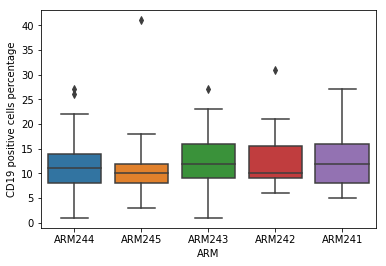

In [35]:
sns.boxplot(x='ARM',y='CD19 positive cells percentage',data=SDY4_CBC_Results_flat);

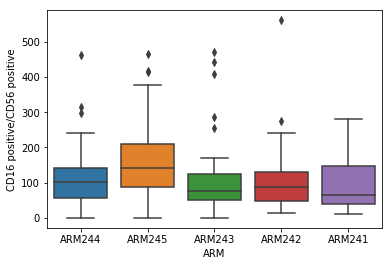

In [36]:
sns.boxplot(x='ARM',y='CD16 positive/CD56 positive',data=SDY4_CBC_Results_flat);

/home/cris/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


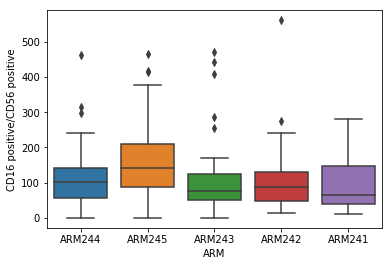

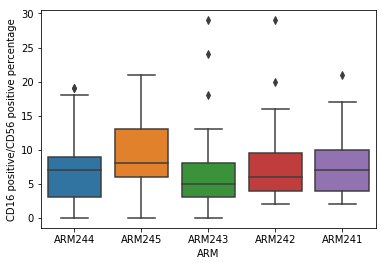

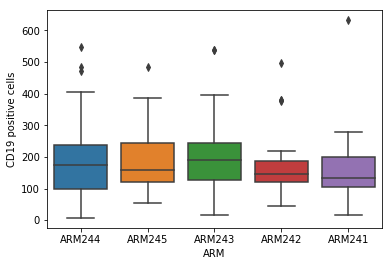

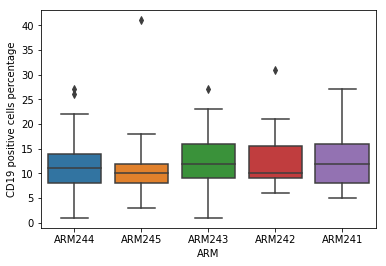

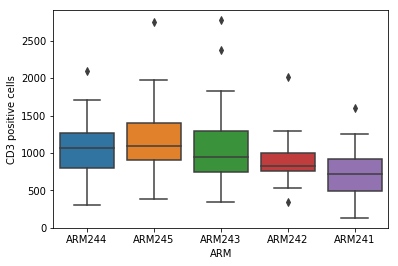

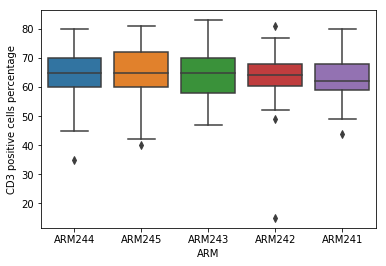

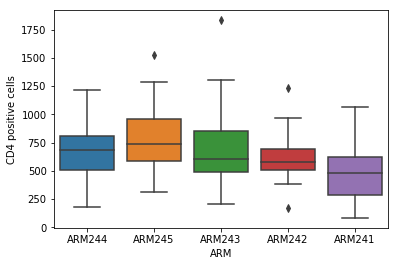

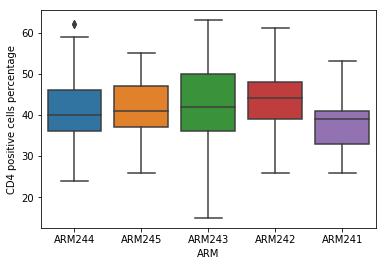

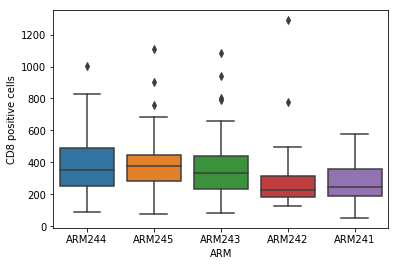

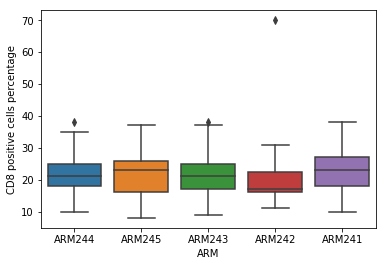

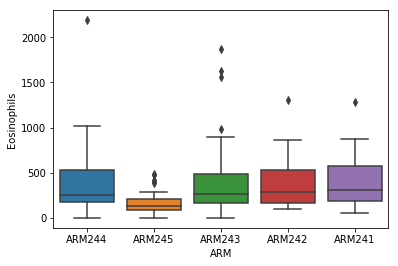

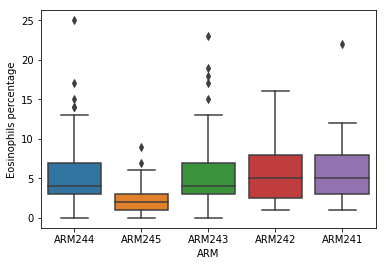

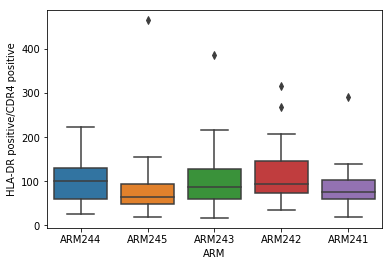

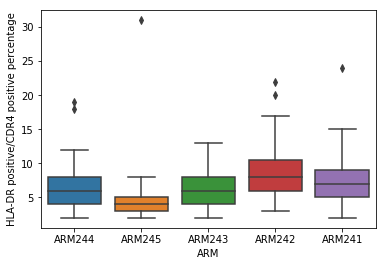

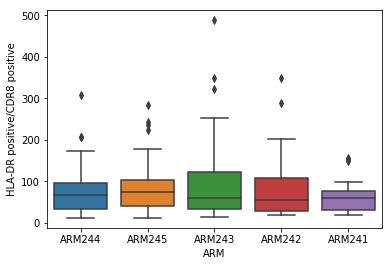

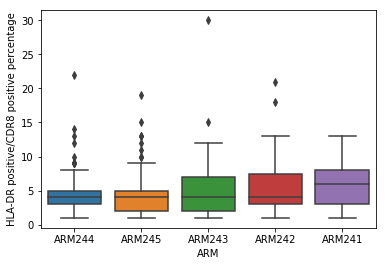

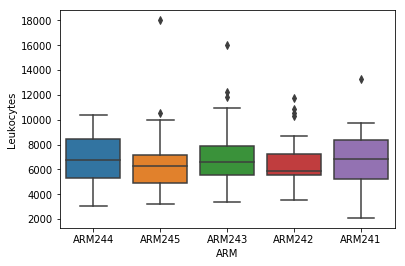

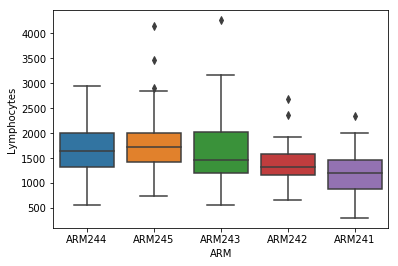

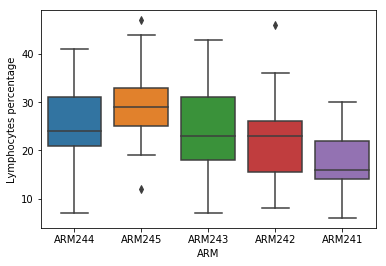

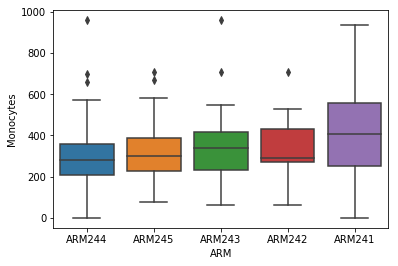

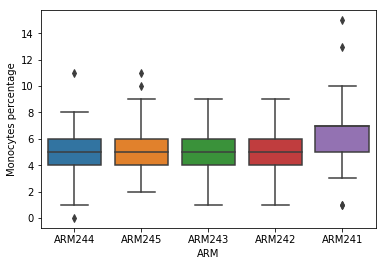

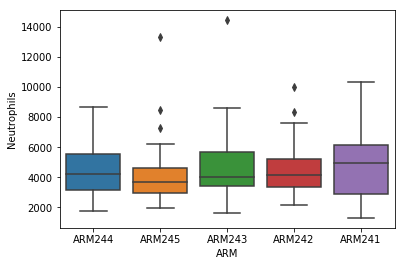

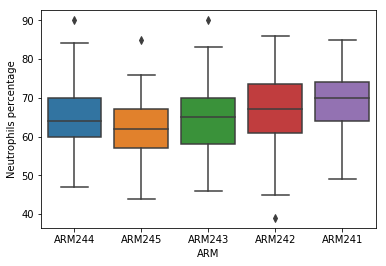

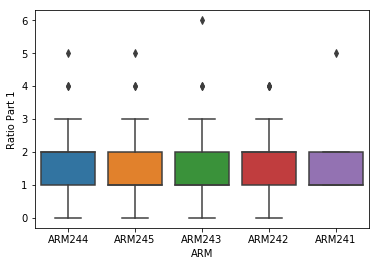

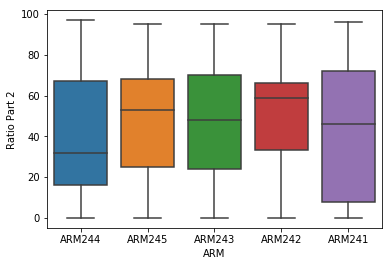

In [37]:
for column_name in SDY4_CBC_Results_flat.columns[2:]:
    plt.figure()
    sns.boxplot(x='ARM',y=column_name,data=SDY4_CBC_Results_flat);